In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import dateutil
from mpl_toolkits.basemap import Basemap


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [41]:
data_311 = pd.read_csv("/home/ec2-user/data/311_service_requests.csv")


/home/ec2-user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data_311 = pd.read_csv("/home/ec2-user/data/311_service_requests.csv")
com_health = pd.read_csv("/home/ec2-user/data/community_health.csv")
demographics = pd.read_csv("/home/ec2-user/data/demographics.csv")
food_est = pd.read_csv("/home/ec2-user/data/food_establishment_inspections.csv", engine='python')
food_venues = pd.read_csv("/home/ec2-user/data/food_venues.csv", encoding = 'latin1')
geo = pd.read_csv("/home/ec2-user/data/geographic.csv")
#data_311.head()
#data_311.complaint_type.unique()

/home/ec2-user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
demo_city = pd.read_csv("/home/ec2-user/data/demographics_city.csv")

In [4]:
data_311.head()

,unique_key,created_date,closed_date,agency_acronym,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,city,status,due_date,resolution_date,community_board,borough,latitude,longitude
0,28272192,06/16/2014 09:34:00 AM,06/16/2014 12:00:00 PM,DSNY,BCC - Brooklyn South,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,11232,218 31 STREET,31 STREET,BROOKLYN,Closed,NaN,06/16/2014 12:00:00 PM,07 BROOKLYN,BROOKLYN,40.656066,-73.999805
1,28272281,06/16/2014 08:21:00 AM,06/16/2014 12:00:00 PM,DSNY,BCC - Brooklyn South,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,11234,5207 AVENUE T,AVENUE T,BROOKLYN,Closed,NaN,06/16/2014 12:00:00 PM,18 BROOKLYN,BROOKLYN,40.611781,-73.923889
2,28272228,06/16/2014 12:00:00 AM,07/15/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11209,230 94 STREET,94 STREET,BROOKLYN,Closed,07/16/2014 12:13:55 PM,07/15/2014 12:00:00 AM,10 BROOKLYN,BROOKLYN,40.618345,-74.034990
3,28272229,06/16/2014 12:00:00 AM,07/01/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11215,NaN,NaN,BROOKLYN,Closed,07/16/2014 02:30:53 PM,07/01/2014 12:00:00 AM,06 BROOKLYN,BROOKLYN,40.662800,-73.978348
4,28272230,06/16/2014 12:00:00 AM,04/28/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10002,174 ORCHARD STREET,ORCHARD STREET,NEW YORK,Pending,07/16/2014 11:05:03 PM,04/28/2014 12:00:00 AM,03 MANHATTAN,MANHATTAN,40.721688,-73.988391


In [6]:
data_311.complaint_type.unique()

array(['Sanitation Condition', 'Rodent', 'Food Poisoning',
       'Food Establishment', 'Dirty Conditions', 'Indoor Air Quality',
       'Smoking', 'Asbestos', 'Drinking Water', 'Mold', 'Drinking',
       'Water System', 'Calorie Labeling', 'Hazardous Materials',
       'Water Quality', 'Air Quality', 'Trans Fat', 'Annual Inspection',
       'Damaged or Dead Tree', 'Animal', 'Injured Wildlife',
       'Homebound Evacuation 4', 'Illegal Animal - Sold/Kept',
       'DORIS Literature Request', 'General Question',
       'BBQ Outside Authorized Area', 'Annual/ Cycle Inspection',
       'Animal Waste', 'Healthcare Facilities', 'MOLD', 'Baby Formula',
       'Illegal Pet - Sold/Kept', 'Hazardous Conditions',
       'Graffiti or Vandalism', 'Grass/Weeds', 'Garbage or Litter',
       'Employee Behavior', 'Health and Safety',
       'Killing/Trapping Pigeon', 'CFC Recovery',
       'DOHMH Literature Request', 'Animal unsanitary condition',
       'Biking/Rollerblading Off Path', 'Health'], dtyp

In [27]:
new_data_311 = data_311[['created_date', 'closed_date', 'agency_name', 'complaint_type', 'descriptor', 'location_type', 'due_date','resolution_date', 'borough', 'latitude', 'longitude']]
# new_data_311.groupby(['complaint_type']).agg('count').head()

In [28]:
dirty_conditions_311 = new_data_311.loc[data_311['complaint_type'] == 'Dirty Conditions']
dirty_conditions_311.head()

,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,due_date,resolution_date,borough,latitude,longitude
16,06/16/2014 08:00:00 AM,06/17/2014 12:00:00 PM,A - Bronx,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,NaN,06/17/2014 12:00:00 PM,BRONX,40.835702,-73.851299
18,06/16/2014 07:45:00 PM,06/18/2014 12:00:00 PM,A - Queens,Dirty Conditions,E3A Dirty Area/Alleyway,Lot,NaN,06/18/2014 12:00:00 PM,QUEENS,40.717503,-73.779887
19,06/16/2014 11:51:00 AM,06/19/2014 12:00:00 PM,A - Manhattan,Dirty Conditions,E11 Litter Surveillance,Sidewalk,NaN,06/19/2014 12:00:00 PM,MANHATTAN,40.754317,-73.986865
21,06/16/2014 02:56:00 AM,06/16/2014 12:00:00 PM,A - Bronx,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,NaN,06/16/2014 12:00:00 PM,BRONX,40.825599,-73.877536
23,06/16/2014 03:59:00 PM,06/21/2014 12:00:00 PM,A - Queens,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,NaN,06/21/2014 12:00:00 PM,QUEENS,40.740572,-73.879294


In [29]:
dirty_conditions_311['date'] = dirty_conditions_311['created_date'].str[0:10]
dirty_conditions_311.head()

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,due_date,resolution_date,borough,latitude,longitude,date
16,06/16/2014 08:00:00 AM,06/17/2014 12:00:00 PM,A - Bronx,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,NaN,06/17/2014 12:00:00 PM,BRONX,40.835702,-73.851299,06/16/2014
18,06/16/2014 07:45:00 PM,06/18/2014 12:00:00 PM,A - Queens,Dirty Conditions,E3A Dirty Area/Alleyway,Lot,NaN,06/18/2014 12:00:00 PM,QUEENS,40.717503,-73.779887,06/16/2014
19,06/16/2014 11:51:00 AM,06/19/2014 12:00:00 PM,A - Manhattan,Dirty Conditions,E11 Litter Surveillance,Sidewalk,NaN,06/19/2014 12:00:00 PM,MANHATTAN,40.754317,-73.986865,06/16/2014
21,06/16/2014 02:56:00 AM,06/16/2014 12:00:00 PM,A - Bronx,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,NaN,06/16/2014 12:00:00 PM,BRONX,40.825599,-73.877536,06/16/2014
23,06/16/2014 03:59:00 PM,06/21/2014 12:00:00 PM,A - Queens,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,NaN,06/21/2014 12:00:00 PM,QUEENS,40.740572,-73.879294,06/16/2014


/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


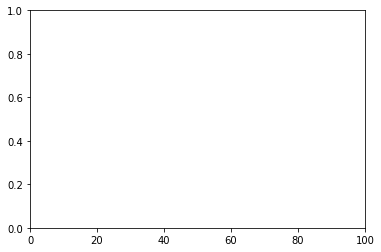

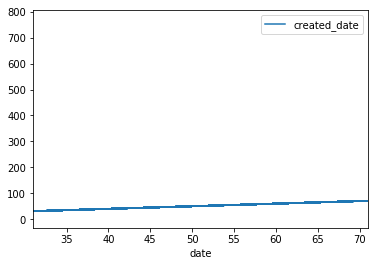

In [41]:

date_times = pd.to_datetime(dirty_conditions_311['date'], format='%m/%d/%Y')
dirty_conditions_311['date_time'] = date_times
dirty_conditions_311_dt = dirty_conditions_311.sort_values('date', ascending=True)
dirty_conditions_311_dt_group = dirty_conditions_311.groupby(['date_time']).agg('count')
dirty_conditions_311_dt_group.reset_index().plot(x='date', y='created_date')

In [48]:
dirty_conditions_311_dt_group.reset_index().head()

,date_time,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,due_date,resolution_date,borough,latitude,longitude,date
0,2010-01-01,31,31,31,31,31,31,0,31,31,31,31,31
1,2010-01-02,35,35,35,35,35,35,0,35,35,35,35,35
2,2010-01-03,23,23,23,23,23,23,0,23,23,22,22,23
3,2010-01-04,81,81,81,81,81,81,0,81,81,79,79,81
4,2010-01-05,105,105,105,105,105,105,0,105,105,102,102,105


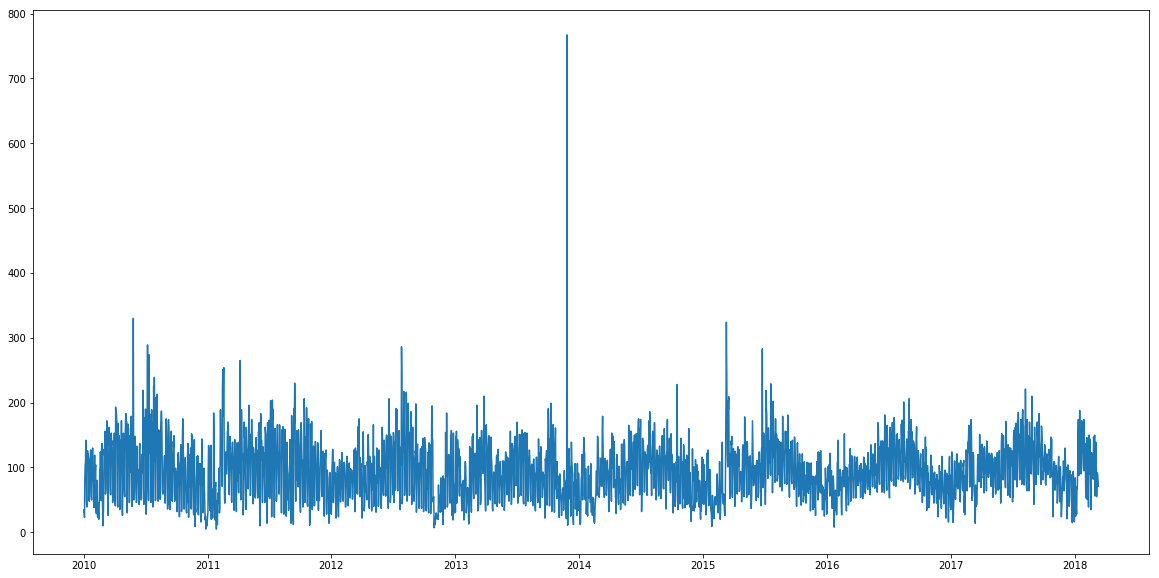

In [47]:
plt.figure(figsize=(20,10))
plt.plot(_44["date_time"], _44["created_date"])

In [122]:
data_311 = pd.read_csv("/home/ec2-user/data/311_service_requests.csv")


/home/ec2-user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [123]:
data_311['date'] = data_311['created_date'].str[0:10]
date_times = pd.to_datetime(data_311['date'], format='%m/%d/%Y')
data_311['date_times'] = date_times
data_311 = data_311.sort_values('date', ascending=True)
data_311['month_year'] = data_311.date_times.dt.to_period('M')

In [124]:
data_311.head()

,unique_key,created_date,closed_date,agency_acronym,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,status,due_date,resolution_date,community_board,borough,latitude,longitude,date,date_times,month_year
772226,15635842,01/01/2010 01:05:00 PM,01/02/2010 11:35:00 AM,DEP,Department of Environmental Protection,Water System,Hydrant Running Full (WA4),NaN,NaN,NaN,...,Closed,01/02/1900 12:00:00 AM,01/02/2010 11:35:00 AM,Unspecified BRONX,BRONX,NaN,NaN,01/01/2010,2010-01-01,2010-01
1043309,15654999,01/01/2010 07:48:00 PM,01/04/2010 12:00:00 PM,DSNY,Brooklyn South 10,Dirty Conditions,E2 Receptacle Violation,Sidewalk,11228,636 92 STREET,...,Closed,NaN,01/04/2010 12:00:00 AM,10 BROOKLYN,BROOKLYN,40.615792,-74.025235,01/01/2010,2010-01-01,2010-01
1042834,15633038,01/01/2010 10:35:38 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10025,NaN,...,Pending,01/15/2010 10:35:38 AM,01/15/2010 12:00:00 AM,07 MANHATTAN,MANHATTAN,40.802928,-73.967575,01/01/2010,2010-01-01,2010-01
384678,15635920,01/01/2010 12:26:00 PM,01/04/2010 02:20:00 PM,DEP,Department of Environmental Protection,Water System,Defective Street Cut (WZZ1),NaN,10002,207 BOWERY,...,Closed,01/02/1900 12:00:00 AM,01/04/2010 02:20:00 PM,03 MANHATTAN,MANHATTAN,40.721364,-73.993618,01/01/2010,2010-01-01,2010-01
384677,15635856,01/01/2010 04:18:00 PM,01/25/2010 08:05:00 AM,DEP,Department of Environmental Protection,Water System,Leak (Use Comments) (WA2),NaN,NaN,NaN,...,Closed,NaN,01/25/2010 08:05:00 AM,Unspecified STATEN ISLAND,STATEN ISLAND,NaN,NaN,01/01/2010,2010-01-01,2010-01


In [125]:
def create_table(table_311, complaint):
    complaint_table = table_311.loc[data_311['complaint_type'] == complaint]
    complaint_table = complaint_table.groupby(['date_times']).agg('count')
    complaint_table = complaint_table.reset_index().head()
    return complaint_table

In [126]:
x = create_table(data_311, 'Dirty Conditions')

In [127]:
x.head()

,date_times,unique_key,created_date,closed_date,agency_acronym,agency_name,complaint_type,descriptor,location_type,incident_zip,...,city,status,due_date,resolution_date,community_board,borough,latitude,longitude,date,month_year
0,2010-01-01,31,31,31,31,31,31,31,31,31,...,31,31,0,31,31,31,31,31,31,31
1,2010-01-02,35,35,35,35,35,35,35,35,35,...,35,35,0,35,35,35,35,35,35,35
2,2010-01-03,23,23,23,23,23,23,23,23,22,...,22,23,0,23,23,23,22,22,23,23
3,2010-01-04,81,81,81,81,81,81,81,81,79,...,79,81,0,81,81,81,79,79,81,81
4,2010-01-05,105,105,105,105,105,105,105,105,102,...,102,105,0,105,105,105,102,102,105,105


In [103]:
# x["month"] = pd.to_datetime(x["month_year"], format='%Y-%m')
# x.head()

In [102]:
# x["month_string"] = str(x["month_year"])
# x.head()

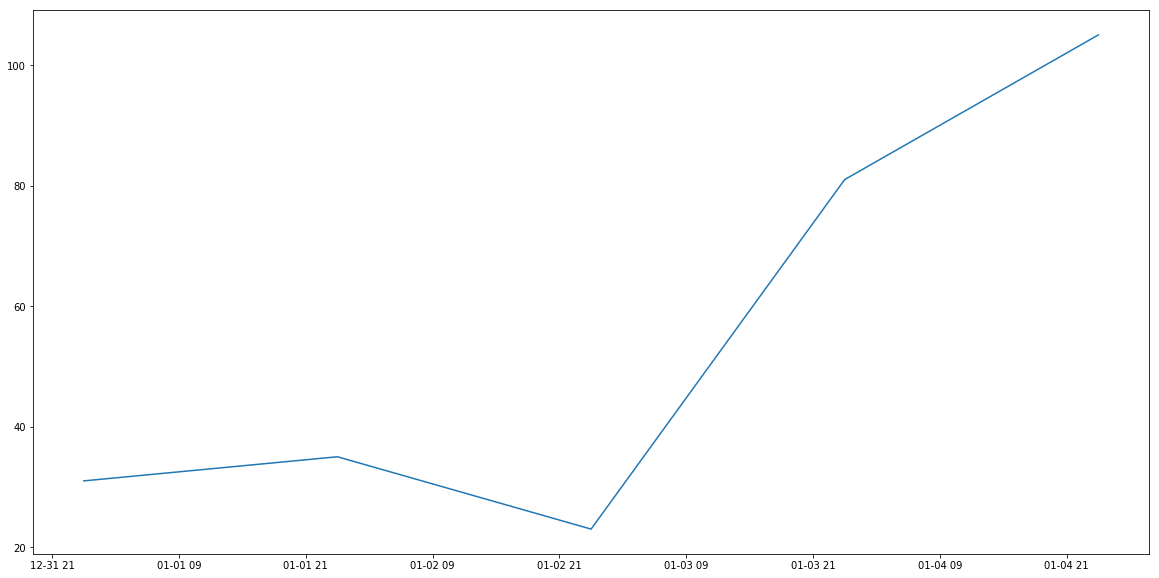

In [128]:
plt.figure(figsize=(20,10))
plt.plot(x["date_times"], x["created_date"])

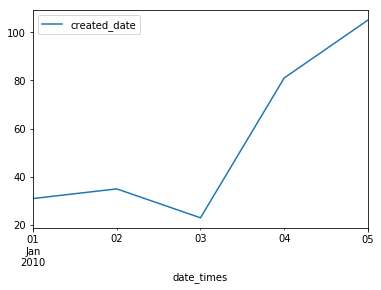

In [130]:
x.reset_index().plot(x='date_times', y='created_date')

In [108]:
x.dtypes

month_year          object
unique_key           int64
created_date         int64
closed_date          int64
agency_acronym       int64
agency_name          int64
complaint_type       int64
descriptor           int64
location_type        int64
incident_zip         int64
incident_address     int64
street_name          int64
city                 int64
status               int64
due_date             int64
resolution_date      int64
community_board      int64
borough              int64
latitude             int64
longitude            int64
date                 int64
date_times           int64
dtype: object

In [131]:
data_311 = pd.read_csv("/home/ec2-user/data/311_service_requests.csv")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
filtered_data_311 = data_311[['created_date_dt', 'closed_date_dt', 'complaint_type', 'due_date_dt','resolution_date_dt', 'latitude', 'longitude']]

In [142]:
data_311['created_date'] = data_311['created_date'].str[0:10] #gets rid of time of day
data_311['created_date_dt'] = pd.to_datetime(data_311['created_date'], format='%m/%d/%Y') #creates datetime object of created date
data_311['closed_date'] = data_311['closed_date'].str[0:10] #gets rid of time of day
data_311['closed_date_dt'] = pd.to_datetime(data_311['closed_date'], format='%m/%d/%Y')
data_311['due_date'] = data_311['due_date'].str[0:10] #gets rid of time of day
data_311['due_date_dt'] = pd.to_datetime(data_311['due_date'], format='%m/%d/%Y')
data_311['resolution_date'] = data_311['resolution_date'].str[0:10] #gets rid of time of day
data_311['resolution_date_dt'] = pd.to_datetime(data_311['resolution_date'], format='%m/%d/%Y')

data_311 = data_311.sort_values('created_date_dt', ascending=True) #sorts by date of request
#data_311['month_year'] = data_311.created_date.dt.to_period('M') #changes to month-year instead of month-date-year doesnt work.

In [145]:
filtered_data_311.head()

,created_date_dt,closed_date_dt,complaint_type,due_date_dt,resolution_date_dt,latitude,longitude
1042881,2010-01-01,2010-01-05,Dirty Conditions,NaT,2010-01-05,40.822868,-73.944228
1042878,2010-01-01,2010-01-05,Dirty Conditions,NaT,2010-01-05,40.689921,-73.950906
669471,2010-01-01,2010-01-02,Water System,1900-01-02,2010-01-02,40.747678,-73.902462
669464,2010-01-01,2010-01-20,Water System,NaT,2010-01-20,40.635500,-74.090276
669472,2010-01-01,2010-01-04,Air Quality,NaT,2010-01-04,40.719680,-73.845930


In [148]:
complaint_table2 = data_311.loc[data_311['complaint_type'] == 'Dirty Conditions']
complaint_table2 = complaint_table2.groupby(['created_date_dt']).agg('count')
complaint_table2 = complaint_table2.reset_index().head()

In [149]:
complaint_table2

,created_date_dt,unique_key,created_date,closed_date,agency_acronym,agency_name,complaint_type,descriptor,location_type,incident_zip,...,status,due_date,resolution_date,community_board,borough,latitude,longitude,closed_date_dt,resolution_date_dt,due_date_dt
0,2010-01-01,31,31,31,31,31,31,31,31,31,...,31,0,31,31,31,31,31,31,31,0
1,2010-01-02,35,35,35,35,35,35,35,35,35,...,35,0,35,35,35,35,35,35,35,0
2,2010-01-03,23,23,23,23,23,23,23,23,22,...,23,0,23,23,23,22,22,23,23,0
3,2010-01-04,81,81,81,81,81,81,81,81,79,...,81,0,81,81,81,79,79,81,81,0
4,2010-01-05,105,105,105,105,105,105,105,105,102,...,105,0,105,105,105,102,102,105,105,0


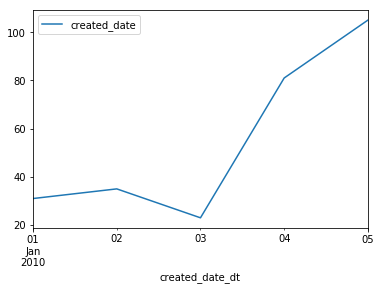

In [153]:
complaint_table2.reset_index().plot(x='created_date_dt', y='created_date')

In [1]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

In [2]:
requests = pd.read_csv("/home/ec2-user/data/311_service_requests.csv")
venues = pd.read_csv("/home/ec2-user/data/food_venues.csv", encoding='latin1')
demographics = pd.read_csv("/home/ec2-user/data/demographics.csv")
demographics_city = pd.read_csv("/home/ec2-user/data/demographics_city.csv")
health = pd.read_csv("/home/ec2-user/data/community_health.csv")
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc_lat = nyc.to_crs({'init': 'epsg:4326'})
nta_map = pd.read_csv("/home/ec2-user/data/requests_labeled.csv")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nta_map = pd.read_csv("/home/ec2-user/data/requests_labeled.csv")

In [4]:
requests_with_nta = requests[["unique_key", "created_date", "closed_date", "complaint_type", "resolution_date", "due_date"]].merge(nta_map, on="unique_key", how="inner")

In [5]:
requests_with_nta["datetime"] = pd.to_datetime(requests_with_nta["created_date"].str[0:10], format="%m/%d/%Y")

In [6]:
requests_nta_month = requests_with_nta.groupby(["nta_code", requests_with_nta["datetime"].dt.strftime("%m-%Y")]).count()

In [7]:
requests_nta_month.drop('datetime',axis = 1, inplace = True)

In [8]:
requests_nta_month_reset = requests_nta_month.reset_index()

In [9]:
requests_nta_month_reset.head()

,nta_code,datetime,unique_key,created_date,closed_date,complaint_type,resolution_date,due_date
0,BK09,01-2010,30,30,26,30,30,9
1,BK09,01-2011,16,16,10,16,16,11
2,BK09,01-2012,50,50,47,50,50,8
3,BK09,01-2013,33,33,30,33,33,10
4,BK09,01-2014,22,22,20,22,22,5


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


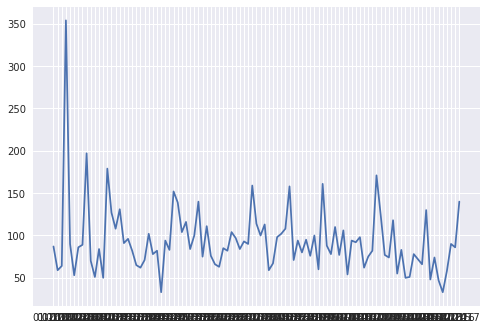

In [10]:
plt.plot(requests_nta_month_reset[requests_nta_month_reset["nta_code"]=="SI54"]['datetime'], requests_nta_month_reset[requests_nta_month_reset["nta_code"]=="SI54"]['unique_key'])

In [11]:
def nta_graph_timeline(df, nta, metric):
    plt.plot(df[df["nta_code"]==nta]['datetime'], df[df["nta_code"]==nta][metric])

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


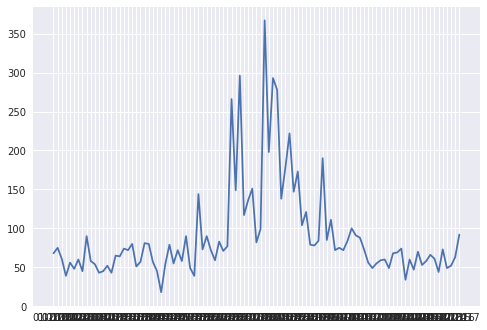

In [12]:
nta_graph_timeline(requests_nta_month_reset, "BX05", "unique_key")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


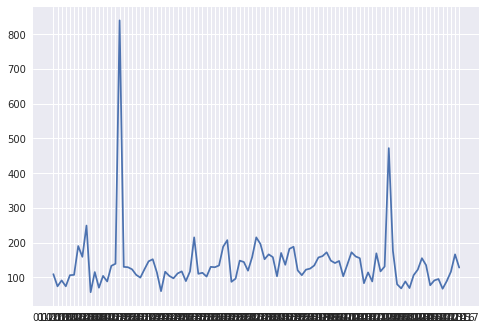

In [13]:
nta_graph_timeline(requests_nta_month_reset, "BK31", "unique_key")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


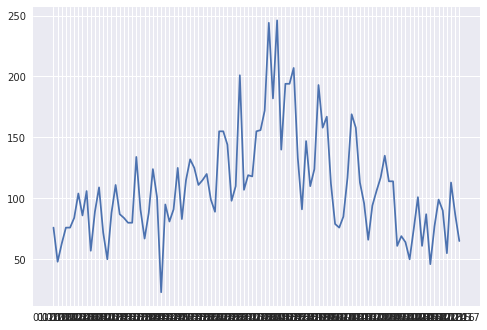

In [14]:
nta_graph_timeline(requests_nta_month_reset, "MN11", "unique_key")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


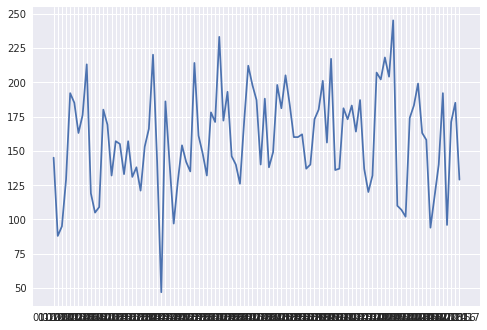

In [15]:
nta_graph_timeline(requests_nta_month_reset, "MN24", "unique_key")

In [16]:
#data_311.head()

In [17]:
nta_map = pd.read_csv("/home/ec2-user/data/requests_labeled.csv")

In [18]:
from datetime import datetime

In [19]:
requests_with_nta = requests[["unique_key", "created_date", "closed_date", "complaint_type", "resolution_date", "due_date"]].merge(nta_map, on="unique_key", how="inner")

In [20]:
requests_with_nta.head()

,unique_key,created_date,closed_date,complaint_type,resolution_date,due_date,nta_code
0,28272192,06/16/2014 09:34:00 AM,06/16/2014 12:00:00 PM,Sanitation Condition,06/16/2014 12:00:00 PM,NaN,BK32
1,28272281,06/16/2014 08:21:00 AM,06/16/2014 12:00:00 PM,Sanitation Condition,06/16/2014 12:00:00 PM,NaN,BK45
2,28272228,06/16/2014 12:00:00 AM,07/15/2014 12:00:00 AM,Rodent,07/15/2014 12:00:00 AM,07/16/2014 12:13:55 PM,BK31
3,28272230,06/16/2014 12:00:00 AM,04/28/2014 12:00:00 AM,Rodent,04/28/2014 12:00:00 AM,07/16/2014 11:05:03 PM,MN27
4,28272232,06/16/2014 06:59:00 AM,06/18/2014 12:00:00 PM,Sanitation Condition,06/18/2014 12:00:00 PM,NaN,BK78


In [21]:
assert(all(requests_with_nta["created_date"].apply(lambda x : int(x[6:10])) >= 2010))
assert(all(requests_with_nta["created_date"].apply(lambda x : int(x[6:10])) <= 2018))

In [68]:
requests_with_nta["year"] = requests_with_nta["created_date"].apply(lambda x : int(x[6:10]))
requests_with_nta["month"] = requests_with_nta["created_date"].apply(lambda x : int(x[0:2]))

In [69]:
assert(all(requests_with_nta["month"] >= 0))
assert(all(requests_with_nta["month"] <= 12))

In [70]:
def groupby_nta_and_year(df, year_lst):
    result = []
    cols = ["nta_code", "year", "month", "calls_count"]
    for name, group in df.groupby(["nta_code", "year", "month"]):
        if name[1] in year_lst:
            result.append([name[0], name[1], name[2], group.shape[0]])
    return pd.DataFrame(result, columns = cols)

def groupby_nta_and_complaint_type_year(df, year_lst):
    result = []
    cols = ["nta_code", "year", "complaint_type", "month", "calls_count"]
    for name, group in df.groupby(["nta_code", "year", "complaint_type", "month"]):
        if name[1] in year_lst:
            result.append([name[0], name[1], name[2], name[3], group.shape[0]])
    return pd.DataFrame(result, columns = cols)

In [71]:
complaints_3 = groupby_nta_and_complaint_type_year(requests_with_nta, range(2011, 2014))

In [72]:
complaints_5 = groupby_nta_and_complaint_type_year(requests_with_nta, range(2011, 2016))

In [73]:
requests_3 = groupby_nta_and_year(requests_with_nta, range(2011, 2014))

In [74]:
requests_5 = groupby_nta_and_year(requests_with_nta, range(2011, 2016))

In [75]:
# calculate_difference
def get_index(row, min_year):
    return (row["year"] - min_year) * 12 + row["month"] - 1

In [76]:
complaints_3.sort_values(by=['nta_code', 'complaint_type', 'year', 'month'])
complaints_5.sort_values(by=['nta_code', 'complaint_type', 'year', 'month'])

,nta_code,year,complaint_type,month,calls_count
0,BK09,2011,Air Quality,2,1
1,BK09,2011,Air Quality,3,4
2,BK09,2011,Air Quality,4,7
3,BK09,2011,Air Quality,5,2
4,BK09,2011,Air Quality,6,11
5,BK09,2011,Air Quality,7,7
6,BK09,2011,Air Quality,8,8
7,BK09,2011,Air Quality,9,3
8,BK09,2011,Air Quality,10,2
9,BK09,2011,Air Quality,11,2


In [77]:
complaint_3

,nta_code,year,complaint_type,month,calls_count,index
0,BK09,2011,Air Quality,1,1,0
1,BK09,2011,Air Quality,2,1,1
2,BK09,2011,Air Quality,5,2,4
3,BK09,2011,Air Quality,6,1,5
4,BK09,2011,Air Quality,8,4,7
5,BK09,2011,Air Quality,9,2,8
6,BK09,2011,Air Quality,10,2,9
7,BK09,2011,Air Quality,12,4,11
8,BK09,2011,Air Quality,13,2,12
9,BK09,2011,Air Quality,14,2,13


In [104]:
requests_3_mindex = min(requests_3["year"])
requests_3["index"] = requests_3.apply(lambda row : get_index(row, requests_3_mindex), axis = 1)

In [109]:
for name, group in requests_3.groupby("nta_code"):
    if len(group) != 36:
        print(group)

     nta_code  year  month  calls_count  index
1944     BX09  2011      1            2      0
1945     BX09  2011      2            4      1
1946     BX09  2011      3            2      2
1947     BX09  2011      4            6      3
1948     BX09  2011      5            4      4
1949     BX09  2011      6            3      5
1950     BX09  2011      7            4      6
1951     BX09  2011      8            2      7
1952     BX09  2011     10            5      9
1953     BX09  2011     11            6     10
1954     BX09  2011     12            4     11
1955     BX09  2012      2            4     13
1956     BX09  2012      3            5     14
1957     BX09  2012      4            4     15
1958     BX09  2012      5            4     16
1959     BX09  2012      6            2     17
1960     BX09  2012      9            2     20
1961     BX09  2012     10            1     21
1962     BX09  2012     11            4     22
1963     BX09  2012     12            5     23
1964     BX09

In [78]:
complaints_5

,nta_code,year,complaint_type,month,calls_count
0,BK09,2011,Air Quality,2,1
1,BK09,2011,Air Quality,3,4
2,BK09,2011,Air Quality,4,7
3,BK09,2011,Air Quality,5,2
4,BK09,2011,Air Quality,6,11
5,BK09,2011,Air Quality,7,7
6,BK09,2011,Air Quality,8,8
7,BK09,2011,Air Quality,9,3
8,BK09,2011,Air Quality,10,2
9,BK09,2011,Air Quality,11,2


In [79]:
requests_3.sort_values(by=['nta_code', 'year', 'month'])
requests_5.sort_values(by=['nta_code', 'year', 'month'])

,nta_code,year,month,calls_count
0,BK09,2011,1,16
1,BK09,2011,2,23
2,BK09,2011,3,37
3,BK09,2011,4,32
4,BK09,2011,5,19
5,BK09,2011,6,45
6,BK09,2011,7,40
7,BK09,2011,8,32
8,BK09,2011,9,24
9,BK09,2011,10,20


In [80]:
requests_3.sort_values(by=['nta_code', 'year', 'month'])

,nta_code,year,month,calls_count
0,BK09,2011,1,16
1,BK09,2011,2,23
2,BK09,2011,3,37
3,BK09,2011,4,32
4,BK09,2011,5,19
5,BK09,2011,6,45
6,BK09,2011,7,40
7,BK09,2011,8,32
8,BK09,2011,9,24
9,BK09,2011,10,20


In [146]:
def get_percentage_diff(df, num_months):
    result = []
    st = range(num_months)
    columns = ["nta_code"] + ["month_{0}_{1}".format(i, i + 1) for i in range(1, num_months)]
    for name, groups in df.groupby(["nta_code"]):
        calls_lst = groups["calls_count"].values.tolist()
        if len(calls_lst) != num_months:
            for i in st:
                if i not in groups["index"].values:
                    calls_lst.insert(i, 0)        
        assert(len(calls_lst) == num_months)
                    
        lst = [name]
        for i, counter in enumerate(calls_lst):
            if i == 0:
                continue
            lst.append(calls_lst[i] - calls_lst[i - 1])
        result.append(lst)
    return pd.DataFrame(result, columns = columns)
    

In [151]:
X_df = get_percentage_diff(requests_3, 36)
X_df.to_csv("../data/X_values.csv")

In [193]:
X_df

,nta_code,month_1_2,month_2_3,month_3_4,month_4_5,month_5_6,month_6_7,month_7_8,month_8_9,month_9_10,...,month_26_27,month_27_28,month_28_29,month_29_30,month_30_31,month_31_32,month_32_33,month_33_34,month_34_35,month_35_36
0,BK09,7,14,-5,-13,26,-5,-8,-8,-4,...,33,-7,-4,-6,-1,-9,-1,1,2,-2
1,BK17,87,-14,-72,48,32,-28,41,-31,-43,...,1,-33,65,-55,3,-5,-43,-7,-4,41
2,BK19,21,4,-18,30,12,-14,4,13,-28,...,-4,-3,11,-2,27,-29,10,-8,-6,-16
3,BK21,14,0,-2,12,22,-7,-16,0,-10,...,4,-3,-4,6,25,-39,10,-25,-2,-3
4,BK23,5,0,-3,6,1,-5,5,3,-12,...,7,-2,0,0,10,-10,-2,2,-4,0
5,BK25,25,-15,15,12,16,-15,-12,0,-13,...,0,3,8,3,25,-9,-25,24,12,-48
6,BK26,13,14,-12,-2,15,-6,3,5,-25,...,13,9,-4,7,-7,14,-25,1,57,-51
7,BK27,30,-2,-8,-11,7,25,-27,0,13,...,3,16,-6,-1,15,-29,5,0,-2,5
8,BK28,7,9,2,13,20,81,-108,55,-49,...,17,45,-16,8,-14,-7,2,-8,-38,31
9,BK29,9,-11,5,-16,13,23,-42,34,-48,...,3,-9,29,-10,-7,25,-4,-39,25,-26


## Plot Linear Regression

In [177]:
y_df = pd.read_csv("../data/Y.csv")
y_df = y_df.rename(index = str, columns = {"NTAID": "nta_code"})

0      BK09
1      BK17
2      BK19
3      BK21
4      BK23
5      BK25
6      BK26
7      BK27
8      BK28
9      BK29
10     BK30
11     BK31
12     BK32
13     BK33
14     BK34
15     BK35
16     BK37
17     BK38
18     BK40
19     BK41
20     BK42
21     BK43
22     BK44
23     BK45
24     BK46
25     BK50
26     BK58
27     BK60
28     BK61
29     BK63
       ... 
165    QN61
166    QN62
167    QN63
168    QN66
169    QN68
170    QN70
171    QN71
172    QN72
173    QN76
174    QN98
175    QN99
176    SI01
177    SI05
178    SI07
179    SI08
180    SI11
181    SI12
182    SI14
183    SI22
184    SI24
185    SI25
186    SI28
187    SI32
188    SI35
189    SI36
190    SI37
191    SI45
192    SI48
193    SI54
194    SI99
Name: nta_code, Length: 195, dtype: object

In [182]:
print(len(set(X_df["nta_code"].values).intersection(y_df["nta_code"].values)))

176


In [187]:
result = []
for row in y_df.values:
    if row[1] in X_df["nta_code"].values:
        result.append([row[0]])
new_y_df = pd.DataFrame(result, columns = y_df.columns.values)

[0 'BK09' 0]
[1 'BK17' 0]
[2 'BK19' 0]
[3 'BK21' 0]
[4 'BK23' 0]
[5 'BK25' 0]
[6 'BK26' 0]
[7 'BK27' 0]
[8 'BK28' 0]
[9 'BK29' 0]
[10 'BK30' 0]
[11 'BK31' 0]
[12 'BK32' 0]
[13 'BK33' 0]
[14 'BK34' 0]
[15 'BK35' 0]
[16 'BK37' 0]
[17 'BK38' 0]
[18 'BK40' 0]
[19 'BK41' 0]
[20 'BK42' 0]
[21 'BK43' 0]
[22 'BK44' 0]
[23 'BK45' 0]
[24 'BK46' 0]
[26 'BK58' 0]
[27 'BK60' 0]
[28 'BK61' 0]
[29 'BK63' 0]
[30 'BK64' 0]
[31 'BK68' 0]
[32 'BK69' 0]
[33 'BK72' 0]
[34 'BK73' 0]
[35 'BK75' 0]
[36 'BK76' 0]
[37 'BK77' 0]
[38 'BK78' 0]
[39 'BK79' 0]
[40 'BK81' 1]
[41 'BK82' 1]
[42 'BK83' 0]
[43 'BK85' 1]
[44 'BK88' 0]
[45 'BK90' 0]
[46 'BK91' 0]
[48 'BK95' 0]
[49 'BK96' 0]
[51 'BX01' 1]
[52 'BX03' 0]
[53 'BX05' 1]
[54 'BX06' 0]
[55 'BX07' 1]
[56 'BX08' 1]
[57 'BX09' 0]
[59 'BX13' 0]
[60 'BX14' 1]
[61 'BX17' 0]
[62 'BX22' 0]
[63 'BX26' 0]
[64 'BX27' 1]
[65 'BX28' 1]
[66 'BX29' 0]
[67 'BX30' 1]
[68 'BX31' 0]
[69 'BX33' 1]
[70 'BX34' 1]
[71 'BX35' 1]
[72 'BX36' 0]
[73 'BX37' 0]
[74 'BX39' 0]
[75 'BX40' 1]
[7

,Unnamed: 0,nta_code,Y
0,0,BK09,0
1,1,BK17,0
2,2,BK19,0
3,3,BK21,0
4,4,BK23,0
5,5,BK25,0
6,6,BK26,0
7,7,BK27,0
8,8,BK28,0
9,9,BK29,0


In [192]:
test_df = pd.merge(X_df, y_df, on = "nta_code")

,nta_code,month_1_2,month_2_3,month_3_4,month_4_5,month_5_6,month_6_7,month_7_8,month_8_9,month_9_10,...,month_28_29,month_29_30,month_30_31,month_31_32,month_32_33,month_33_34,month_34_35,month_35_36,Unnamed: 0,Y
0,BK09,7,14,-5,-13,26,-5,-8,-8,-4,...,-4,-6,-1,-9,-1,1,2,-2,0,0
1,BK17,87,-14,-72,48,32,-28,41,-31,-43,...,65,-55,3,-5,-43,-7,-4,41,1,0
2,BK19,21,4,-18,30,12,-14,4,13,-28,...,11,-2,27,-29,10,-8,-6,-16,2,0
3,BK21,14,0,-2,12,22,-7,-16,0,-10,...,-4,6,25,-39,10,-25,-2,-3,3,0
4,BK23,5,0,-3,6,1,-5,5,3,-12,...,0,0,10,-10,-2,2,-4,0,4,0
5,BK25,25,-15,15,12,16,-15,-12,0,-13,...,8,3,25,-9,-25,24,12,-48,5,0
6,BK26,13,14,-12,-2,15,-6,3,5,-25,...,-4,7,-7,14,-25,1,57,-51,6,0
7,BK27,30,-2,-8,-11,7,25,-27,0,13,...,-6,-1,15,-29,5,0,-2,5,7,0
8,BK28,7,9,2,13,20,81,-108,55,-49,...,-16,8,-14,-7,2,-8,-38,31,8,0
9,BK29,9,-11,5,-16,13,23,-42,34,-48,...,29,-10,-7,25,-4,-39,25,-26,9,0


In [306]:
test_df["month_min"] = test_df.apply(lambda row : min([row[x] for x in test_df.columns.values if "month" in x]), axis = 1)

In [307]:
test_df["month_max"] = test_df.apply(lambda row : max([row[x] for x in test_df.columns.values if "month" in x]), axis = 1)

In [308]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, datasets
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GroupKFold, GroupShuffleSplit
import seaborn as sns
from scipy.stats import pearsonr

,nta_code,month_1_2,month_2_3,month_3_4,month_4_5,month_5_6,month_6_7,month_7_8,month_8_9,month_9_10,...,month_29_30,month_30_31,month_31_32,month_32_33,month_33_34,month_34_35,month_35_36,Unnamed: 0,Y,month_min
0,BK09,7,14,-5,-13,26,-5,-8,-8,-4,...,-6,-1,-9,-1,1,2,-2,0,0,-29
1,BK17,87,-14,-72,48,32,-28,41,-31,-43,...,-55,3,-5,-43,-7,-4,41,1,0,-72
2,BK19,21,4,-18,30,12,-14,4,13,-28,...,-2,27,-29,10,-8,-6,-16,2,0,-31
3,BK21,14,0,-2,12,22,-7,-16,0,-10,...,6,25,-39,10,-25,-2,-3,3,0,-39
4,BK23,5,0,-3,6,1,-5,5,3,-12,...,0,10,-10,-2,2,-4,0,4,0,-13
5,BK25,25,-15,15,12,16,-15,-12,0,-13,...,3,25,-9,-25,24,12,-48,5,0,-52
6,BK26,13,14,-12,-2,15,-6,3,5,-25,...,7,-7,14,-25,1,57,-51,6,0,-51
7,BK27,30,-2,-8,-11,7,25,-27,0,13,...,-1,15,-29,5,0,-2,5,7,0,-33
8,BK28,7,9,2,13,20,81,-108,55,-49,...,8,-14,-7,2,-8,-38,31,8,0,-108
9,BK29,9,-11,5,-16,13,23,-42,34,-48,...,-10,-7,25,-4,-39,25,-26,9,0,-48


In [309]:
X = test_df[[x for x in test_df.columns.values if "month" in x]].values

y = test_df[["Y"]].values


In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [311]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [312]:
y_pred = (model.predict_proba(X_test)[:,1] > 0.5).astype(int)
y_pred_mse = model.predict_proba(X_test)[:, 1]

In [313]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [314]:
y_pred_mse

array([2.53987685e-22, 6.45446226e-26, 2.35690074e-11, 1.64039650e-08,
       9.98786041e-01, 1.89835792e-27, 8.15594820e-22, 1.87654695e-40,
       9.99999146e-01, 4.28839605e-58, 1.38508493e-05, 2.02881371e-30,
       9.99996283e-01, 1.34582115e-10, 2.03183793e-10, 2.20880311e-10,
       1.11601255e-02, 1.21566260e-21, 5.71764721e-12, 4.65968893e-07,
       1.55606245e-08, 9.83820058e-01, 1.12030493e-17, 8.23079875e-26,
       5.04672252e-36, 6.05625960e-08, 4.74859720e-04, 4.53347581e-26,
       1.32601350e-28, 6.28274036e-18, 7.88248732e-18, 4.04762554e-62,
       1.92947153e-54, 4.36686821e-22, 4.45494962e-14, 1.23937549e-05])

In [315]:
model.coef_

array([[-0.2272715 , -0.26035835, -0.09399306,  0.34563164,  0.38961594,
         0.32212632, -0.02786974,  0.35499342,  0.39995589,  0.21244565,
         0.30904787,  0.52021647, -0.02220602, -0.12832007,  0.17869834,
         0.06013315,  0.03974361, -0.073958  , -0.25156354, -0.54407294,
        -0.04999575,  0.06485411,  0.11901975,  0.11073595,  0.2399429 ,
        -0.07165803, -0.27562575, -0.41006102,  0.10549583, -0.24544229,
        -0.10518302,  0.05956306,  0.13109682,  0.78272156,  0.78168625,
         0.25127035, -0.22778317]])

In [316]:
print("Accuracy of model = {0}".format(accuracy_score(y_pred, y_test)))
print("MSE of model = {0}".format(mean_squared_error(y_pred_mse, y_test)))

Accuracy of model = 0.8611111111111112
MSE of model = 0.1388987252323006


In [317]:
def cross_validate_score(model, X, y, model_name, scoring_dict, features_name, cv = 5, groups = None, verbose = True):
    start_time = time.time()
    scores = dict([("train_" + scoring_name, []) for scoring_name in scoring_dict.keys()] + 
                  [("test_" + scoring_name, []) for scoring_name in scoring_dict.keys()])
    if groups is None:
        kf = KFold(n_splits = cv)
        train_test_folds = kf.split(X)
    else:
        gkf = GroupKFold(n_splits = cv)
        train_test_folds = gkf.split(X, y, groups = groups)
    for i, (train, test) in enumerate(train_test_folds):
        if verbose: 
            print("Evaluating {0}-Fold Cross Validation".format(i + 1))
        model.fit(X[train], y[train])
        y_test_pred = model.predict(X[test])
        y_train_pred = model.predict(X[train])
        for scoring_name, scoring_method in scoring_dict.items():
            scoring_method(y[train], y_train_pred)
            scores["train_" + scoring_name].append(scoring_method(y[train], y_train_pred))
            scores["test_" + scoring_name].append(scoring_method(y[test], y_test_pred))
    for scoring_name in scoring_dict.keys():
        if verbose: 
            print("Score of {0} model with {1} Features has {2}-fold cross validation train {3} of: {4:.2f} (+/- {5:.2f})".format(model_name, features_name, cv, scoring_name, np.mean(scores["train_" + scoring_name]), 2 * np.std(scores["train_" + scoring_name])))
            print("Score of {0} model with {1} Features has {2}-fold cross validation test {3} of: {4:.2f} (+/- {5:.2f})".format(model_name, features_name, cv, scoring_name, np.mean(scores["test_" + scoring_name]), 2 * np.std(scores["test_" + scoring_name])))        
    if verbose: 
        print("Cross Validation with {0} model took {1:.2f} seconds".format(model_name, time.time() - start_time))
    return scores

In [318]:
accuracy_scores = []
accuracy_scores_train = []
for i, (train, test) in enumerate(KFold(n_splits = 5).split(X)):
    model.fit(X[train], y[train])
    y_test_pred = model.predict(X[test])
    y_train_pred = model.predict(X[train])
    accuracy_scores.append(accuracy_score(y[test], y_test_pred))
    accuracy_scores_train.append(accuracy_score(y[train], y_train_pred))
print(np.array(accuracy_scores).mean(), np.array(accuracy_scores).std())

0.7776190476190477 0.1222947630534308


/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [319]:
mse_lst = []
for i, (train, test) in enumerate(KFold(n_splits = 5).split(X)):
    model.fit(X[train], y[train])
    y_test_pred = model.predict_proba(X[test])[:,1]
    mse_lst.append(mean_squared_error(y[test], y_test_pred))

print(np.array(mse_lst).mean(), np.array(mse_lst).std())

0.21509631178720595 0.11446372725547703


/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


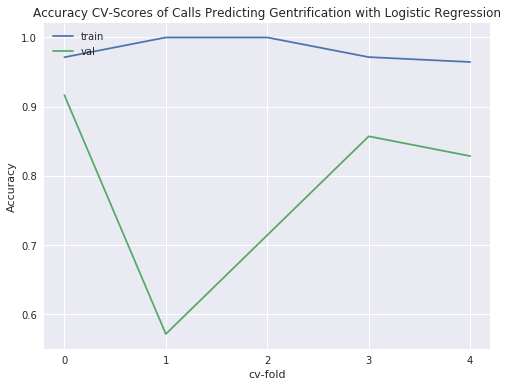

In [320]:
plt.figure(figsize = (8, 6))
plt.plot(accuracy_scores_train)
plt.plot(accuracy_scores)
num_folds = 5
plt.title("Accuracy CV-Scores of Calls Predicting Gentrification with Logistic Regression")
plt.ylabel("Accuracy")
plt.xlabel("cv-fold")
plt.xticks(np.arange(0, num_folds, 1.0))
plt.legend(["train", "val"], loc = "upper left")
plt.show()

In [330]:
print(model.coef_)

# Those values, however, will show that the second parameter
# is more influential
print(np.std(X, 0)*model.coef_)

[[-0.014879   -0.02821709  0.21093555  0.2518839   0.28738931  0.21469461
   0.12491676  0.17703596  0.25830692  0.224389    0.05639368  0.14262979
  -0.16029097 -0.25446399  0.07779135  0.19406522  0.1890088   0.14651175
   0.06208972 -0.04492715 -0.05544065 -0.08241899 -0.1163472   0.02997258
   0.12725375  0.10469654 -0.05499826  0.03104274  0.26774746  0.20354654
   0.28025994  0.31418149  0.43251128  0.30965483  0.35989057  0.02410836
  -0.15381063]]
[[ -0.3488977   -0.61969191   3.94023942   5.6030803   14.46718416
   15.61065997  12.0447376    5.22138419   6.86846454   6.75291617
    1.59378795   2.59058501  -3.42169962  -5.5380095    1.70361492
    6.41677543  11.77538161   6.50950452   3.7454058   -1.51760473
   -1.41163325  -2.06488478  -2.61382847   1.02445044   4.52280973
    2.24139378  -1.34552081   0.69254364   7.64697845  14.39681336
   23.63636548   5.51832262  17.49271417  13.14735708   6.89364668
    2.42839631 -12.47119049]]


In [326]:
columns = [x for x in test_df.columns.values if "month" in x]

In [ ]:
    bar_one = df[feature].values
    ind = np.arange(len(bar_one))  # the x locations for the groups
    width = 0.4    # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.barh(ind, bar_one, width, color = color)
    
    ax.set_title(title)
    ax.set_yticks(ind + width / 2)
    ax.set_yticklabels(y_indexes)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()
    return ax, fig

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


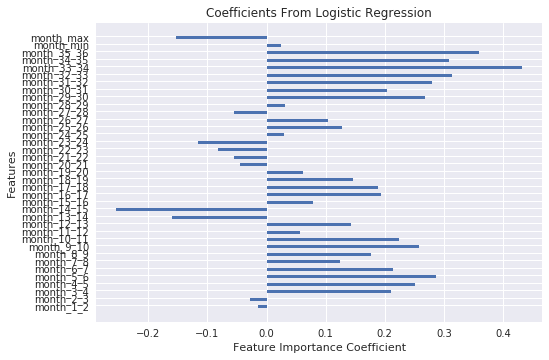

In [342]:
bar_one = coef
ind = np.arange(len(bar_one))  # the x locations for the groups
width = 0.4    # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(ind, bar_one, width)
    
ax.set_title("Coefficients From Logistic Regression")
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(columns)
ax.set_xlabel("Feature Importance Coefficient")
ax.set_ylabel("Features")
plt.show()

In [333]:
columns

['month_1_2',
 'month_2_3',
 'month_3_4',
 'month_4_5',
 'month_5_6',
 'month_6_7',
 'month_7_8',
 'month_8_9',
 'month_9_10',
 'month_10_11',
 'month_11_12',
 'month_12_13',
 'month_13_14',
 'month_14_15',
 'month_15_16',
 'month_16_17',
 'month_17_18',
 'month_18_19',
 'month_19_20',
 'month_20_21',
 'month_21_22',
 'month_22_23',
 'month_23_24',
 'month_24_25',
 'month_25_26',
 'month_26_27',
 'month_27_28',
 'month_28_29',
 'month_29_30',
 'month_30_31',
 'month_31_32',
 'month_32_33',
 'month_33_34',
 'month_34_35',
 'month_35_36',
 'month_min',
 'month_max']

In [336]:
coef = model.coef_.flatten().tolist()